In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
import numpy as np
%matplotlib inline

(x_trainval, y_trainval), (x_test, y_test) = mnist.load_data()
print(x_trainval.shape)
x_trainval = x_trainval.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
print(x_trainval.shape)

(60000, 28, 28)
(60000, 784)


In [75]:
rfc = RandomForestClassifier(n_jobs = -1)
param_grid = { 
               "n_estimators" : [1, 15, 30, 45,63, 100],
               "max_depth" : [1, 5, 10, 15, 20, 30, 42]}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(x_trainval, y_trainval)
print(CV_rfc.best_params_)



{'max_depth': 42, 'n_estimators': 100}


In [81]:
cv_scores=[]
seed = 123

# Optimized RF classifier
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=100,max_depth=42)

kfold = model_selection.KFold(n_splits=10, random_state=seed)


In [89]:
history_obj=rfc.fit(x_trainval, y_trainval)
y_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print ("random forest accuracy: ",accuracy*100)

random forest accuracy:  96.97


In [100]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 100, 2)
train_scores, test_scores = validation_curve(rfc,
                                            x_trainval,
                                            y_trainval,
                                            param_name="n_estimators",
                                            param_range=param_range,
                                            cv=3,
                                            scoring="accuracy",
                                            n_jobs=-1)

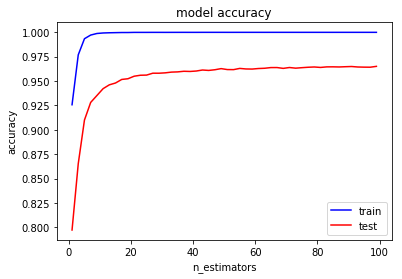

(60000, 784)
(50, 3)
(50,)
[0.92574164 0.97690833 0.99345002 0.99720832 0.99881667 0.99934166
 0.99955833 0.99968333 0.99980833 0.99981666 0.99995    0.99995
 0.99995    0.999975   0.999975   0.99995833 0.999975   0.99998333
 0.99999167 0.99998333 0.99998333 1.         1.         1.
 1.         0.99999167 0.99999167 1.         1.         1.
 1.         0.99999167 1.         1.         1.         1.
 1.         0.99999167 1.         1.         1.         1.
 0.99999167 1.         1.         1.         1.         1.
 1.         1.        ]


In [109]:
# Calculate mean and standard deviation for training set scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score (test)", color="red")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend(['train', 'test'], loc='lower right')

plt.show()

print(x_trainval.shape)
print(train_scores.shape)
print(train_mean.shape)
print(train_mean)

In [107]:
print(train_scores[1])

[0.97677268 0.97717557 0.97677674]
